In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
df_aug = pd.read_csv('animal_LSTM_eval - Augustus_all.csv')
df_nn = pd.read_csv('animal_LSTM_eval - ZCPHo_6_flexible_overlapping.csv')

genomes = set(df_aug['genome']).intersection(set(df_nn['genome']))

df_aug = df_aug[df_aug['genome'].isin(genomes)].reset_index(drop=True)
df_nn = df_nn[df_nn['genome'].isin(genomes)].reset_index(drop=True)

df_aug = df_aug.drop(columns=['acc_overall', 'f1_ig', 'f1_utr', 'f1_exon', 'f1_intron', 'legacy_f1_cds','f1_genic'])

# add nn values to aug df
df_aug['NN'] = df_nn['sub_genic']
df_animals = df_aug.rename(columns={'sub_genic': 'AUG', 'genome': 'species'})


(0.0, 1.0)

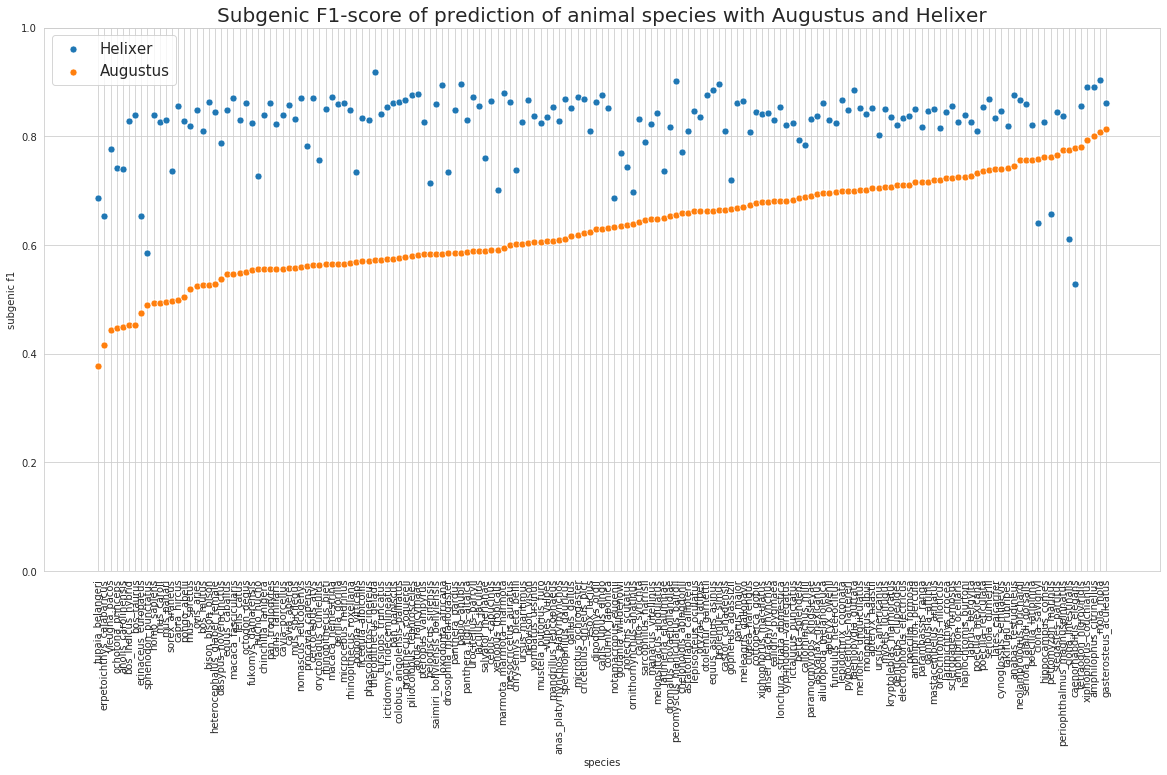

In [50]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 1,sharey=True, figsize=(20,10))
score_plot = sns.scatterplot(x='species',y='NN',data=df_animals.sort_values(by="AUG"), s=50)
score_plot = sns.scatterplot(x='species',y='AUG',data=df_animals.sort_values(by="AUG"), s=50)
plt.title("Subgenic F1-score of prediction of animal species with Augustus and Helixer",fontsize=20)
plt.xlabel("species")
plt.ylabel("subgenic f1")
plt.legend(["Helixer","Augustus"],fontsize=15)
plt.xticks(rotation=90);
plt.ylim((0.0, 1.0))

(0.0, 1.0)

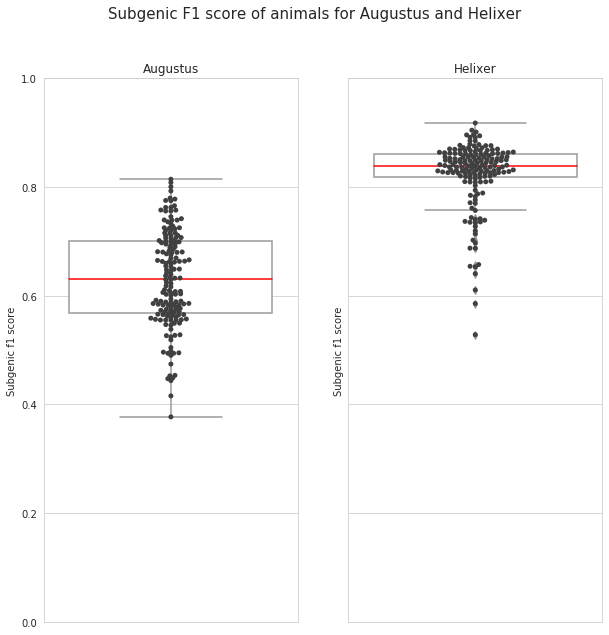

In [48]:
sns.set_style("whitegrid")
f, axes = plt.subplots(1, 2,sharey=True, figsize=(10,10))

sns.boxplot(y=df_animals["AUG"],medianprops={'color':'red'},ax=axes[0],color="white")
sns.swarmplot(y="AUG", data=df_animals,ax=axes[0],color=".25")
axes[0].set_title('Augustus')
axes[0].set_ylabel("Subgenic f1 score")

sns.boxplot(y=df_animals["NN"],medianprops={'color':'red'},ax=axes[1],color="white")
sns.swarmplot(y="NN", data=df_animals,ax=axes[1],color=".25")
axes[1].set_title('Helixer')
axes[1].set_ylabel("Subgenic f1 score")

plt.suptitle("Subgenic F1 score of animals for Augustus and Helixer",fontsize=15)
plt.ylim((0.0, 1.0))